In [1]:
import random
import sys
import numpy as np
import pandas as pd
sys.path.append("../src")  # Adds source directory to python modules path.
from nn import neural_network

In [2]:
df = pd.read_csv('../datasets/wheat-seeds.csv', header=None) # importing without header as csv doesn't have one

In [5]:
# Preparing the data to pass into the Neural Network

training_data = df[[i for i in range(len(df.columns) - 1)]]
training_data_label = df[len(df.columns) - 1]

data_rows = [rows for _, rows in training_data.iterrows()]

labels = []
for i in training_data_label:
    if(i == 1):
        labels.append([1, 0, 0])
    elif(i == 2):
        labels.append([0, 1, 0])
    elif(i == 3):
        labels.append([0, 0, 1])

training = [{'inputs': data_rows[i], 'output': labels[i]} for i in range(len(training_data_label))]

# training[0]['outputs']
# data = random.choice(training)
# data['output']


## CAUTION!!! 
#### If you already have a saved model for this data, then don't waste you time training it, just load it... 

#### Otherwise, just uncomment this cell

In [6]:
# neural network
# nn = neural_network(len(rows[0]), 10, 3)
# iterations = len(rows) * 1000
# print(f'Training NN with {iterations} iterations')
# for x in range(iterations):
#     # Use random data from the training set in every iteration
#     data = random.choice(training)
#     # Training with that data
#     nn.train(data['inputs'], data['output'])
#     # To print the progress every 10%
#     if x % (iterations / 10) == 0:
#         print((x / (iterations / 10) * 10), '%')

#print()
# model = nn.save_model('seeds-data') 

In [10]:
# if alread have a saved model, load it here
nn = neural_network(len(data_rows[0]), 10, 3)
nn = nn.load_model('seeds-data') # Testing loading of the pre-trained model

In [11]:
tests_data = [
        [12.3, 13.34, 0.8684, 5.243, 2.974, 5.637, 5.063],
        [18.72, 16.19, 0.8977, 6.006, 3.857, 5.324, 5.879], 
        [16.23, 15.18, 0.885, 5.872, 3.472, 3.769, 5.922], 
        [16.2, 15.27, 0.8734, 5.826, 3.464, 2.823, 5.527], 
        [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.163], 
        [14.16, 14.4, 0.8584, 5.658, 3.129, 3.072, 5.176], 
        [11.56, 13.31, 0.8198, 5.363, 2.683, 4.062, 5.182]
    ]
test_labels = [3, 2, 2, 1, 2, 1, 3]
print()
print()

# nn = nn.load_model('xor-data') # Testing loading of the pre-trained model
print("Running tests for the test data")
print('')
i = 0
for test in tests_data:
    # Get the NN prediction of each input
    prediction = nn.predict(test)
    max_pred_value = np.max(prediction)
    max_pred_index = np.where(prediction == max_pred_value)[0][0] + 1
    # Print the results
    print(f'Seeds: {test}')
    print(f'PREDICTION: {max_pred_index}, Actual: {test_labels[i]}')
    # print(f'MAX PREDICTION: {max_pred_index}')
    # print(f'PRECISION: {prediction}')
    i += 1
    print('')



Running tests for the test data

Seeds: [12.3, 13.34, 0.8684, 5.243, 2.974, 5.637, 5.063]
PREDICTION: 3, Actual: 3

Seeds: [18.72, 16.19, 0.8977, 6.006, 3.857, 5.324, 5.879]
PREDICTION: 2, Actual: 2

Seeds: [16.23, 15.18, 0.885, 5.872, 3.472, 3.769, 5.922]
PREDICTION: 2, Actual: 2

Seeds: [16.2, 15.27, 0.8734, 5.826, 3.464, 2.823, 5.527]
PREDICTION: 2, Actual: 1

Seeds: [19.06, 16.45, 0.8854, 6.416, 3.719, 2.248, 6.163]
PREDICTION: 2, Actual: 2

Seeds: [14.16, 14.4, 0.8584, 5.658, 3.129, 3.072, 5.176]
PREDICTION: 2, Actual: 1

Seeds: [11.56, 13.31, 0.8198, 5.363, 2.683, 4.062, 5.182]
PREDICTION: 3, Actual: 3



In [42]:
df = [{
    'inputs': [3, 5],
    'output': [75]
},
{
    'inputs':[5, 1],
    'output': [82],
},
{
    'inputs':[10, 2],
    'output': [93],
},
# {
#     'inputs':[5, 8],
#     'output': [5/5],
# },
# {
#     'inputs':[8, 6],
#     'output': [3/5],
# },
]

# print(df)

out_list = []
for d in df:
    out_list.append(d['output'][0])

max_item = np.max(out_list)

for d in df:
    d['output'] = [d['output'][0] / max_item]

In [43]:
len(df)

3

In [44]:
nn = neural_network(2, 10, 1)
iterations = len(df) * 1000
print(f'Training NN with {iterations} iterations')
for x in range(iterations):
    # Use random data from the training set in every iteration
    data = random.choice(df)
    # Training with that data
    nn.train(data['inputs'], data['output'])
    # To print the progress every 10%
    if x % (iterations / 10) == 0:
        print((x / (iterations / 10) * 10), '%')

Training NN with 3000 iterations
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


In [186]:
print(nn.predict([3, 5])[0] * (max_item))


74.92294934973913


In [187]:
cases_df

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
8,2020-01-30,2068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9,2020-01-31,1692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
10,2020-02-01,2111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
11,2020-02-02,4749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
12,2020-02-03,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2021-04-04,552763.0,81.0,9503.0,348.0,98.0,57.0,52.0,0.0,9955.0,...,34932.0,3853.0,188.0,0.0,0.0,1786.0,5.0,101.0,130.0,12.0
439,2021-04-05,489699.0,41.0,9254.0,264.0,117.0,55.0,86.0,3.0,13667.0,...,77794.0,2201.0,179.0,0.0,0.0,1425.0,6.0,83.0,79.0,11.0
440,2021-04-06,605501.0,62.0,9576.0,141.0,140.0,42.0,168.0,0.0,20870.0,...,61958.0,3105.0,133.0,0.0,0.0,1526.0,11.0,94.0,62.0,32.0
441,2021-04-07,684346.0,94.0,11674.0,256.0,125.0,35.0,125.0,4.0,22039.0,...,75038.0,3924.0,192.0,0.0,0.0,1115.0,11.0,72.0,315.0,18.0


In [174]:

cases_df = pd.read_csv('../datasets/new_cases.csv')
cases_df = cases_df[8:]
df_india_list = []
# print(cases_df['India'])
counter = 0
for i in cases_df['India']:
    if np.isnan(i):
        df_india_list.append([0])
    else:
        df_india_list.append([i])

In [175]:
max_cases = np.max(df_india_list)
df_india = []
counter = 0
for i in df_india_list:
    # print(i[0])
    df_india.append({
        'input': [counter],
        'output': [i[0] / max_cases]
    })

print(df_india[400])

{'input': [0], 'output': [0.13854873908826382]}


In [200]:
nn_india_cases = neural_network(1, 10, 1)
iterations = len(df_india) * 2
print(f'Training NN with {iterations} iterations')
for x in range(iterations):
    # Use random data from the training set in every iteration
    data = random.choice(df_india)
    # Training with that data
    nn_india_cases.train(data['input'], data['output'])
    # To print the progress every 10%
    if x % (iterations / 10) == 0:
        print((x / (iterations / 10) * 10), '%')


Training NN with 870 iterations
0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


In [201]:
nn_india_cases.save_model('india_cases')

Model saved as 'india_cases'


In [217]:
# print(f'Max cases : {max_cases}')
print(np.ceil(nn_india_cases.predict([435])[0] * max_cases))

(cases_df['India'][442])


28899.0


131968.0

In [142]:
import matplotlib.pyplot as plt

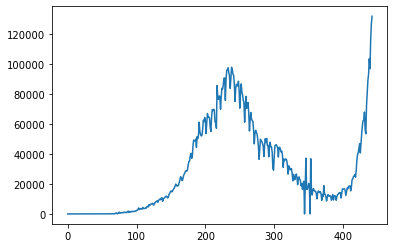

In [147]:
plt.plot([i for i in range(len(df_india))], df_india_list)